Let's take the libraries that we need: As usual, <tt>pandas</tt> and <tt> matplotlib</tt>.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
from matplotlib.dates import YearLocator, DateFormatter
from aux import Aux
aux = Aux()

plt.style.use('classic')
rc('text', usetex=True)
rc('font', size=14)
rc('legend', fontsize=13)
#rc('text.latex', preamble=r'\usepackage{cmbright}')


We can now simply download a plot the data:

In [3]:
IP = pd.read_csv(aux.find("IP.PRN")).apply(lambda x: aux.my_idx(x))
GMYXP8 = pd.read_csv(aux.find("GMYXP8.PRN")).apply(lambda x: aux.my_idx(x))
MT82 = pd.read_csv(aux.find("MT82.PRN")).apply(lambda x: aux.my_idx(x))
LPMHU = pd.read_csv(aux.find("LPMHUADJ.PRN")).apply(lambda x:aux.my_idx(x))

Let's create a unified dataframe with all the data and save it:

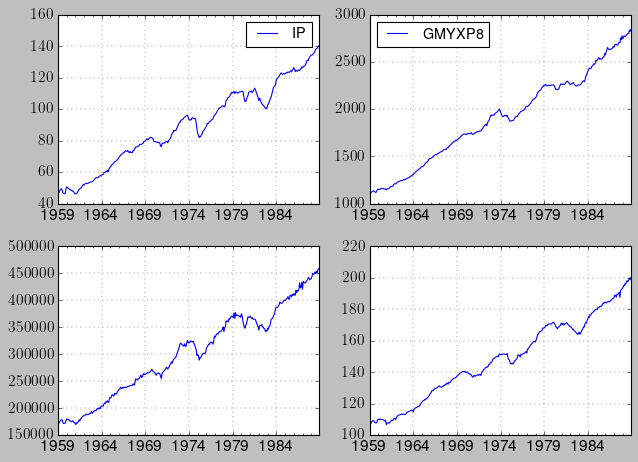

In [4]:
df = pd.concat([IP, GMYXP8, MT82, LPMHU], axis=1).dropna()
df.columns = [item.strip() for item in df.columns]
df.index = pd.to_datetime(df.index)
df.to_csv(aux.find("s&w1989.csv"))

# Initiate the figure:
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()
# Plot everything in four different subplots
df.IP.plot(ax=axs[0,0], legend='IP')
df.GMYXP8.plot(ax=axs[0,1], legend='GMYXP8')
df.MT82.plot(ax=axs[1,0])
df.LPMHU.plot(ax=axs[1,1])
# Plot grids:
for i in range(2):
    for j in range(2):
        axs[i,j].grid(linewidth=0.3)
# Save it:
name = "s&w1989.eps"
aux.save_myfig(name,fig)

Let's standardise the data:

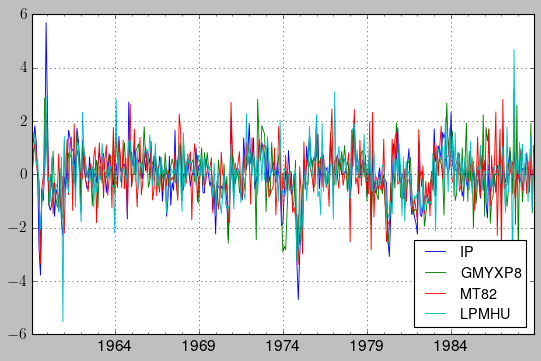

In [6]:
standardised_df = aux.standardise(aux.Δ(aux.log_df(df)))

fig=aux.aurum_fig()
ax=fig.gca()
standardised_df.plot(ax=ax, linewidth=0.8)
ax.grid()
name = "standardised_s&w1989.eps"
aux.save_myfig(name, fig)